#Preprocessing

In [71]:
# Importing the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

sns.set_style('darkgrid')

In [72]:
# import dataset 
df = pd.read_csv('income_evaluation.csv')

In [73]:
#menampilkan 5 dataset awal
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [74]:
## check null values in dataset
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [75]:
df.shape

(32561, 15)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#Eksplorasi Data

In [117]:
df.describe()

,age,workclass,final_weight,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
count,30162.000000,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,2.109343,1.897938e+05,3.368842,10.121312,1.075061,4.615609,1.523971,0.211823,0.675685,1092.007858,88.372489,40.931238,1.183509,0.248922
std,13.134665,0.934785,1.056530e+05,3.404320,2.549995,1.217557,3.432195,1.431980,0.612461,0.468126,7406.346497,404.298370,11.979984,4.947070,0.432396
min,17.000000,0.000000,1.376900e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.176272e+05,1.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,2.000000,1.784250e+05,2.000000,10.000000,1.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,47.000000,2.000000,2.376285e+05,5.000000,13.000000,1.000000,8.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,6.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


In [77]:
df.columns = ['age', 'workclass', 'final_weight', 'education', 'education_num', 'martial_status', 'occupation', 'relationship', 'race', 'sex',
             'capital_gain', 'capital_loss', 'hrs_per_week', 'native_country', 'income']

In [78]:
df.columns

Index(['age', 'workclass', 'final_weight', 'education', 'education_num',
       'martial_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hrs_per_week', 'native_country',
       'income'],
      dtype='object')

In [79]:
df.income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [80]:
## converting income columns to 0's and 1's {0 for salary <=50K and 1 for salary >50K}
df['income'] = [1 if value == ' >50K' else 0 for value in df['income'].values]

In [82]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [83]:
## removing ? from column workclass 
df['workclass'] = np.where(df.workclass == ' ?', np.nan, df['workclass'])

In [84]:
df.dropna(axis=0, inplace=True)

In [85]:
workclass_label = {v:k for k, v in enumerate(df.workclass.unique())}

In [86]:
workclass_label

{' State-gov': 0,
 ' Self-emp-not-inc': 1,
 ' Private': 2,
 ' Federal-gov': 3,
 ' Local-gov': 4,
 ' Self-emp-inc': 5,
 ' Without-pay': 6,
 ' Never-worked': 7}

In [87]:
df.workclass = df.workclass.map(workclass_label)

In [88]:
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [89]:
education_label = {v:k for k, v in enumerate(df.education.unique())}

In [90]:
education_label

{' Bachelors': 0,
 ' HS-grad': 1,
 ' 11th': 2,
 ' Masters': 3,
 ' 9th': 4,
 ' Some-college': 5,
 ' Assoc-acdm': 6,
 ' Assoc-voc': 7,
 ' 7th-8th': 8,
 ' Doctorate': 9,
 ' Prof-school': 10,
 ' 5th-6th': 11,
 ' 10th': 12,
 ' Preschool': 13,
 ' 12th': 14,
 ' 1st-4th': 15}

In [91]:
df.education = df.education.map(education_label)

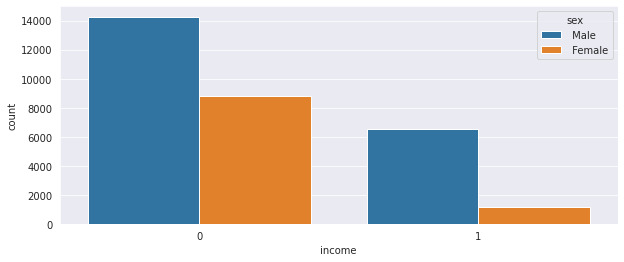

In [92]:
plt.figure(figsize=(10, 4))
sns.countplot(x='income', data=df, hue='sex');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


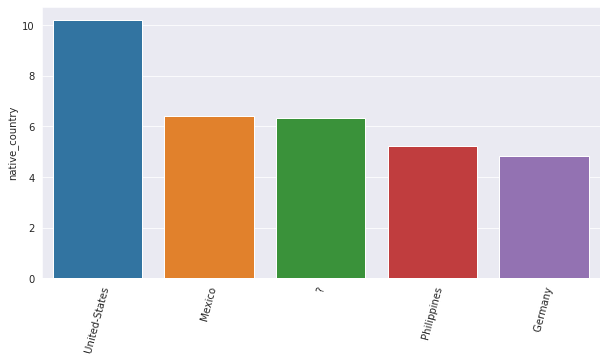

In [93]:
native_country = df.native_country.value_counts().nlargest(5)

plt.figure(figsize=(10, 5))
plt.xticks(rotation=75)
sns.barplot(native_country.index, np.log(native_country));

In [94]:
df.native_country = np.where(df.native_country == ' ?', np.nan, df['native_country'])

In [95]:
df.dropna(axis=0, inplace=True)

In [96]:
native_country = {v:k for k, v in enumerate(df.native_country.unique())}

In [97]:
df.native_country = df.native_country.map(native_country)

In [98]:
df.head()

,age,workclass,final_weight,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
0,39,0,77516,0,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0,0
1,50,1,83311,0,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0,0
2,38,2,215646,1,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0,0
3,53,2,234721,2,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0,0
4,28,2,338409,0,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,1,0


In [99]:
df.martial_status.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [100]:
marital_label = {v:k for k, v in enumerate(df.martial_status.unique())}

In [101]:
df.martial_status = df.martial_status.map(marital_label)

In [102]:
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv', ' ?'], dtype=object)

In [103]:
df.occupation = np.where(df.occupation == ' ?', np.nan, df['occupation'])

In [104]:
df.dropna(axis=0, inplace=True)

In [105]:
occ_label = {v:k for k, v in enumerate(df.occupation.unique())}

In [106]:
df.occupation = df.occupation.map(occ_label)

In [107]:
df.relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [108]:
relationship_label = {v:k for k, v in enumerate(df.relationship.unique())}

In [109]:
df.relationship = df.relationship.map(relationship_label)

In [110]:
df.head()

,age,workclass,final_weight,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
0,39,0,77516,0,13,0,0,0,White,Male,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,White,Male,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,White,Male,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,Black,Male,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,Black,Female,0,0,40,1,0


In [111]:
df.sex = np.where(df.sex == ' Male', 1, 0)

In [112]:
df.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [113]:
race_label = {v:k for k, v in enumerate(df.race.unique())}

In [114]:
race_label

{' White': 0,
 ' Black': 1,
 ' Asian-Pac-Islander': 2,
 ' Amer-Indian-Eskimo': 3,
 ' Other': 4}

In [115]:
df.race = df.race.map(race_label)

In [116]:
df.head()

,age,workclass,final_weight,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
0,39,0,77516,0,13,0,0,0,0,1,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,1,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,1,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,1,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,0,0,0,40,1,0


#LogisticRegression

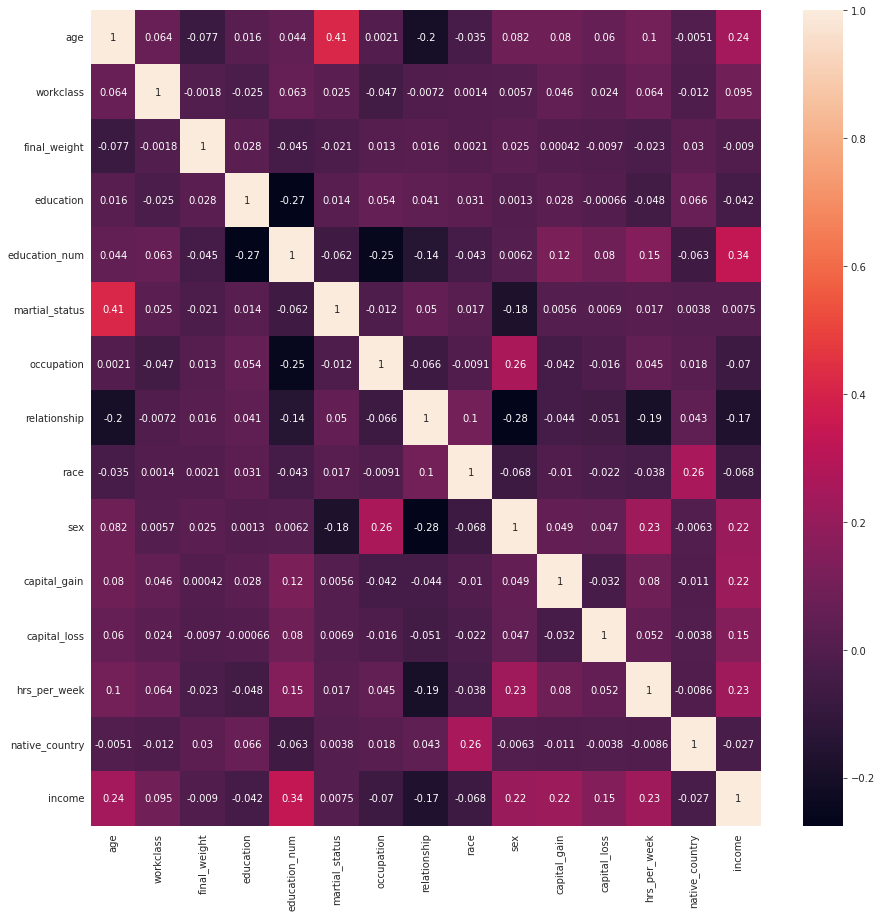

In [118]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True);

memperoleh capital gain, final weight dan capital gain tinggi dan seragam.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


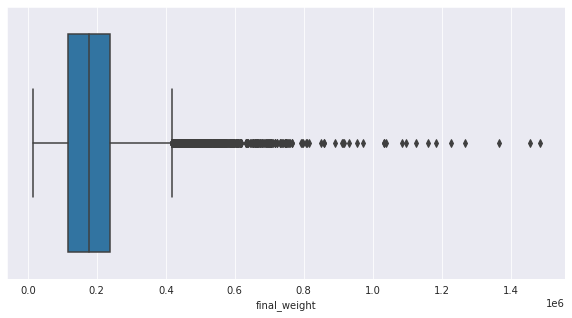

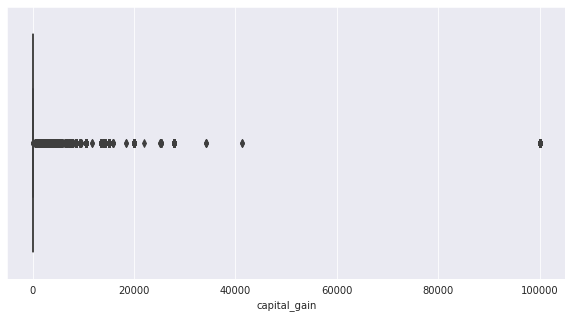

In [119]:
for feature in ['final_weight', 'capital_gain']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[feature])

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [121]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [122]:
X = X.values
y = y.values

sc = StandardScaler()
sc.fit_transform(X)

array([[ 0.04279571, -2.25653747, -1.0627216 , ..., -0.21858598,
        -0.07773411, -0.23923831],
       [ 0.88028814, -1.18675527, -1.00787131, ..., -0.21858598,
        -2.3315307 , -0.23923831],
       [-0.03333996, -0.11697307,  0.24469349, ..., -0.21858598,
        -0.07773411, -0.23923831],
       ...,
       [ 1.48937355, -0.11697307, -0.3585745 , ..., -0.21858598,
        -0.07773411, -0.23923831],
       [-1.25151078, -0.11697307,  0.11070545, ..., -0.21858598,
        -1.74721307, -0.23923831],
       [ 1.0325595 ,  3.09237353,  0.92884082, ..., -0.21858598,
        -0.07773411, -0.23923831]])

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
lg = LogisticRegression()

In [126]:
lg.fit(X_train, y_train)

LogisticRegression()

In [127]:
pred = lg.predict(X_test)

In [128]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

--------------------------------------------Classification Report---------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      6767
           1       0.71      0.25      0.37      2282

    accuracy                           0.79      9049
   macro avg       0.75      0.61      0.62      9049
weighted avg       0.77      0.79      0.74      9049

------------------------------------------Accuracy Score---------------------------------------------------------
0.785390650900652
--------------------------------------------Confustion Matrix-----------------------------------------------------


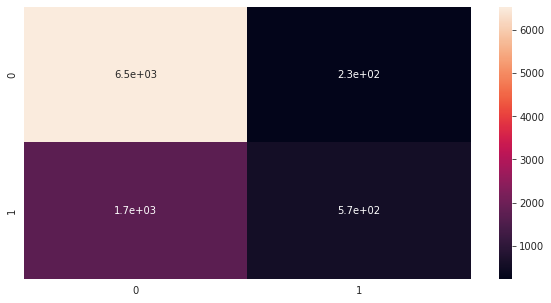

In [129]:
print("--------------------------------------------Classification Report---------------------------------------------")
print(classification_report(y_test, pred))

print("------------------------------------------Accuracy Score---------------------------------------------------------")
print(accuracy_score(y_test, pred))

print("--------------------------------------------Confustion Matrix-----------------------------------------------------")
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, pred), annot=True);

#Decision tree Clasification

In [130]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [131]:
# Putting feature variable to X
X = df.drop('income',axis=1)

# Putting response variable to y
y = df['income']

In [132]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,age,workclass,final_weight,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country
24363,28,2,31493,0,13,0,10,3,0,1,0,0,40,0
15648,26,1,93806,5,10,1,5,1,0,1,0,0,55,0
4445,57,4,52267,3,14,1,1,1,0,1,0,0,50,0
23991,62,2,345780,7,11,2,4,0,0,1,0,0,40,0
26857,47,2,102628,3,14,1,1,1,0,1,15024,0,55,0


In [133]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [134]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      6813
           1       0.75      0.50      0.60      2236

    accuracy                           0.84      9049
   macro avg       0.80      0.72      0.75      9049
weighted avg       0.83      0.84      0.82      9049



In [135]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6448  365]
 [1112 1124]]
0.836777544480053


In [136]:
# Putting features
features = list(df.columns[1:])
features

['workclass',
 'final_weight',
 'education',
 'education_num',
 'martial_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hrs_per_week',
 'native_country',
 'income']

kfold metode Cross Validation untuk menemukan kombinasi akurasi yang terbaik, 
menggunkaan k fold 5 karena mencari hiyperparameter

gridSearchCV termasuk modul scikit-learn yang bertujuan untuk melakukan validasi untuk lebih dari satu model dan hyperparameter masing-masing secara otomatis dan sistematis.

In [137]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}
# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [138]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013477,0.003152,0.003281,0.001656,1,{'max_depth': 1},0.794222,0.793038,0.794459,0.792989,...,0.793445,0.000758,38,0.793250,0.793546,0.793191,0.793559,0.793677,0.793445,0.000189
1,0.019616,0.002438,0.002516,0.000464,2,{'max_depth': 2},0.794222,0.793038,0.794459,0.792989,...,0.793445,0.000758,38,0.793250,0.793546,0.793191,0.793559,0.793677,0.793445,0.000189
2,0.023234,0.000257,0.002501,0.000058,3,{'max_depth': 3},0.824059,0.816008,0.820507,0.827807,...,0.822527,0.003995,17,0.822617,0.824630,0.823327,0.821680,0.822568,0.822965,0.000983
3,0.029573,0.001232,0.002625,0.000108,4,{'max_depth': 4},0.843476,0.834715,0.840398,0.845097,...,0.842467,0.004702,10,0.842747,0.843872,0.843813,0.842283,0.841750,0.842893,0.000837
4,0.039505,0.004251,0.002735,0.000338,5,{'max_depth': 5},0.844423,0.835188,0.840635,0.844623,...,0.842799,0.004660,8,0.843458,0.846063,0.844642,0.842993,0.842283,0.843888,0.001331


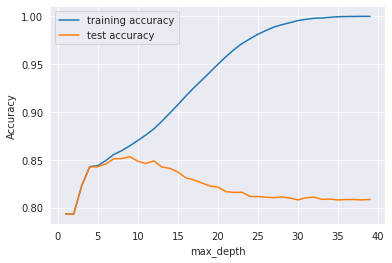

In [139]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")

plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Kesimpulan


Kesimpulan yang diperoleh, bahwa dataset Income menggunakan metode logisticRegression memperoleh akurasi 0.79. demikian, dilakukan kembali uji model dengan menggunakan metode Decision Tree memperoleh akurasi 0.84. sehingga pada dataset Income yang digunakan lebih baik menggunakan metode Desicion Tree.